# Exploratory data analysis

In [1]:
# !pip install regex
# !pip install wheel
# !apt-get install python3

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import collections
import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

In [3]:
df_reddit = pickle.load(open('../DataSet/df_reddit.pkl', 'rb'))
df_reddit.head()

author  created_utc         domain      id  num_comments  \
0            illichian   1579413305    i.imgur.com  eqsltj             2   
1               itstie   1579412680      i.redd.it  eqsibf             0   
2        NASA_POTD_bot   1579410507  apod.nasa.gov  eqs6cb             0   
3          AMC-Eagle85   1579410277      i.redd.it  eqs4zd             6   
4  BorisTheSpacePerson   1579404939      i.redd.it  eqr7wu             0   

   over_18 post_hint  score  \
0    False      link      1   
1    False     Empty      1   
2    False     Empty      1   
3    False     Empty      1   
4    False     Empty      1   

                                         text_merged subreddit  
0                             star shine saturn ring      NASA  
1                smithsonian nation air space museum      NASA  
2                          incred expand crab nebula      NASA  
3                                  columbia readi st      NASA  
4  went ksc christma got see made interest spacef...      NASA

In [4]:
df_reddit.shape

(12000, 10)

In [5]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
author          12000 non-null object
created_utc     12000 non-null int64
domain          12000 non-null object
id              12000 non-null object
num_comments    12000 non-null int64
over_18         12000 non-null bool
post_hint       12000 non-null object
score           12000 non-null int64
text_merged     12000 non-null object
subreddit       12000 non-null object
dtypes: bool(1), int64(3), object(6)
memory usage: 855.5+ KB


## Exploratory data analysis on data.

* Count the number of words on text and add a new column with number of words.
* Apply sentiment analyzer on each text and add it as a new column.
* seperate the date and add it to data.

In [6]:
nltk.download('vader_lexicon')
# Mighani Approach:
#Counting the charcaters and word in "text_merged"
#df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["word_count*"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score*'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])

df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
df_reddit.shape

(12000, 13)

In [8]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
author              12000 non-null object
created_utc         12000 non-null int64
domain              12000 non-null object
id                  12000 non-null object
num_comments        12000 non-null int64
over_18             12000 non-null bool
post_hint           12000 non-null object
score               12000 non-null int64
text_merged         12000 non-null object
subreddit           12000 non-null object
word_count*         12000 non-null int64
sentiment_score*    12000 non-null float64
date                12000 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


Lets turn the subreddit column to numerical values.

In [9]:
df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
targets = df_reddit['target']

In [10]:
df_reddit.head()

author  created_utc         domain      id  num_comments  \
0            illichian   1579413305    i.imgur.com  eqsltj             2   
1               itstie   1579412680      i.redd.it  eqsibf             0   
2        NASA_POTD_bot   1579410507  apod.nasa.gov  eqs6cb             0   
3          AMC-Eagle85   1579410277      i.redd.it  eqs4zd             6   
4  BorisTheSpacePerson   1579404939      i.redd.it  eqr7wu             0   

   over_18 post_hint  score  \
0    False      link      1   
1    False     Empty      1   
2    False     Empty      1   
3    False     Empty      1   
4    False     Empty      1   

                                         text_merged subreddit  word_count*  \
0                             star shine saturn ring      NASA            4   
1                smithsonian nation air space museum      NASA            5   
2                          incred expand crab nebula      NASA            4   
3                                  columbia readi st      NASA            3   
4  went ksc christma got see made interest spacef...      NASA            8   

   sentiment_score*                date  target  
0            0.0000 2020-01-19 05:55:05       1  
1            0.0000 2020-01-19 05:44:40       1  
2            0.3182 2020-01-19 05:08:27       1  
3            0.0000 2020-01-19 05:04:37       1  
4            0.4588 2020-01-19 03:35:39       1

Drop the column named domain below.

In [11]:
cols = ['domain', 'author', 'created_utc', 'id', 'num_comments', 'over_18', 'post_hint',
       'score', 'date', 'subreddit']

df_reddit.drop(columns=cols, inplace = True)

In [12]:
df_reddit.head()

text_merged  word_count*  \
0                             star shine saturn ring            4   
1                smithsonian nation air space museum            5   
2                          incred expand crab nebula            4   
3                                  columbia readi st            3   
4  went ksc christma got see made interest spacef...            8   

   sentiment_score*  target  
0            0.0000       1  
1            0.0000       1  
2            0.3182       1  
3            0.0000       1  
4            0.4588       1

In [13]:
print(df_reddit.groupby("target")["word_count*"].describe().T)

target            0            1
count   6000.000000  6000.000000
mean      16.488333    13.118500
std       38.869637    26.267733
min        1.000000     1.000000
25%        5.000000     4.000000
50%        8.000000     7.000000
75%       15.000000    11.000000
max     1005.000000   552.000000


In [14]:
print(df_reddit.groupby("target")["sentiment_score*"].describe().T)

target            0            1
count   6000.000000  6000.000000
mean       0.099742     0.104667
std        0.313117     0.293992
min       -0.996700    -0.972300
25%        0.000000     0.000000
50%        0.000000     0.000000
75%        0.226300     0.077200
max        0.998500     0.994000


Keep the track of nasa and space_discussion as follow.

In [15]:
sub_nasa_mask = df_reddit["target"] == 1
sub_space_mask = df_reddit["target"] == 0

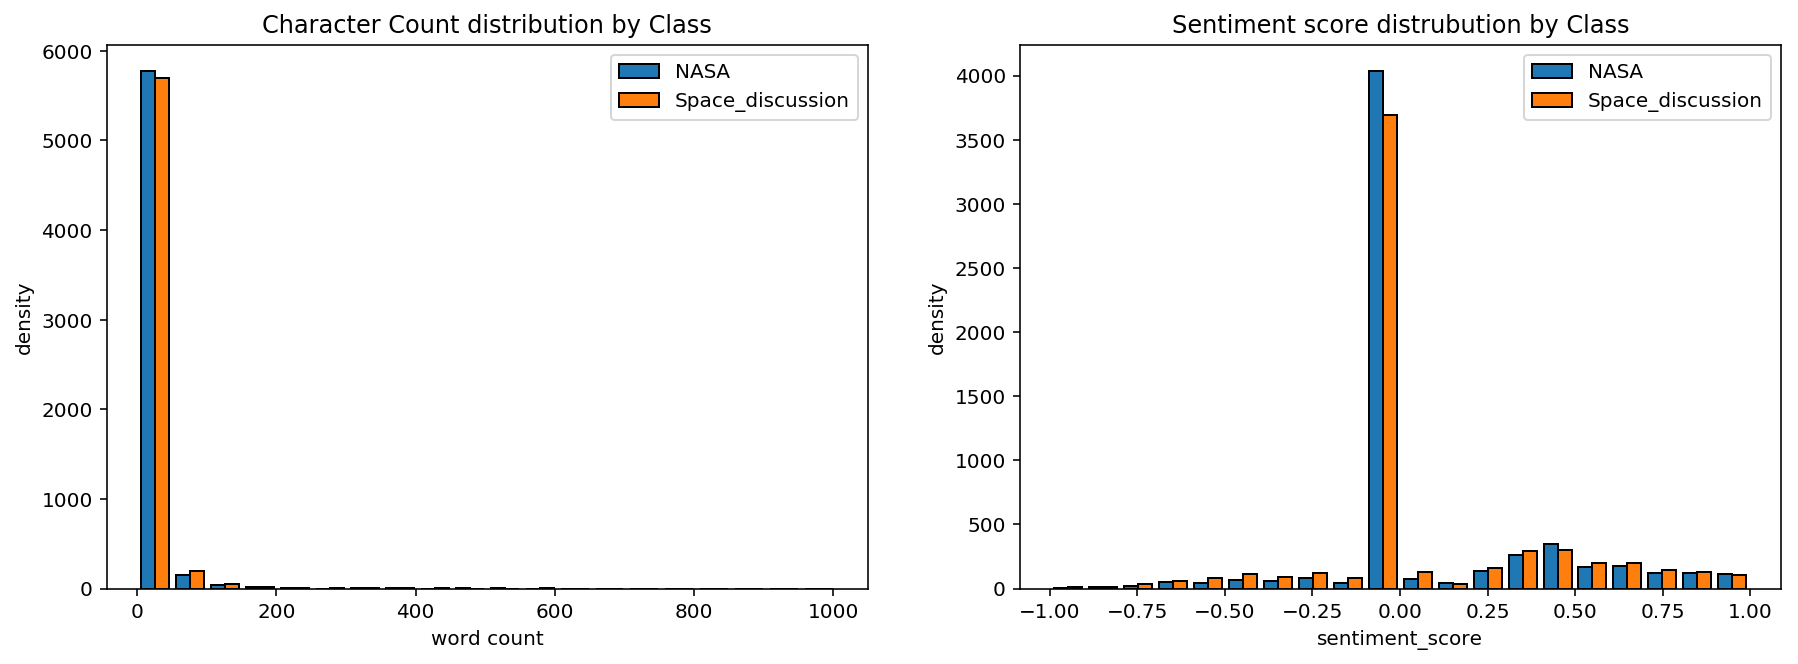

In [16]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.hist([df_reddit[sub_nasa_mask]['word_count*'], 
          df_reddit[sub_space_mask]['word_count*']],
          bins=20, ec='k', density=False)
plt.title('Character Count distribution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('word count'); plt.ylabel('density')


plt.subplot(1, 2, 2)
plt.hist([df_reddit[sub_nasa_mask]['sentiment_score*'], 
          df_reddit[sub_space_mask]['sentiment_score*']],
          bins=20, ec='k', density=False)
plt.title('Sentiment score distrubution by Class', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('sentiment_score'); plt.ylabel('density')

plt.savefig("../Figures/distribution_plots.png")

Check out the corrolation between variables.

In [17]:
df_reddit_corr = df_reddit.corr()

In [18]:
df_reddit_corr

word_count*  sentiment_score*    target
word_count*          1.000000          0.291378 -0.050731
sentiment_score*     0.291378          1.000000  0.008109
target              -0.050731          0.008109  1.000000

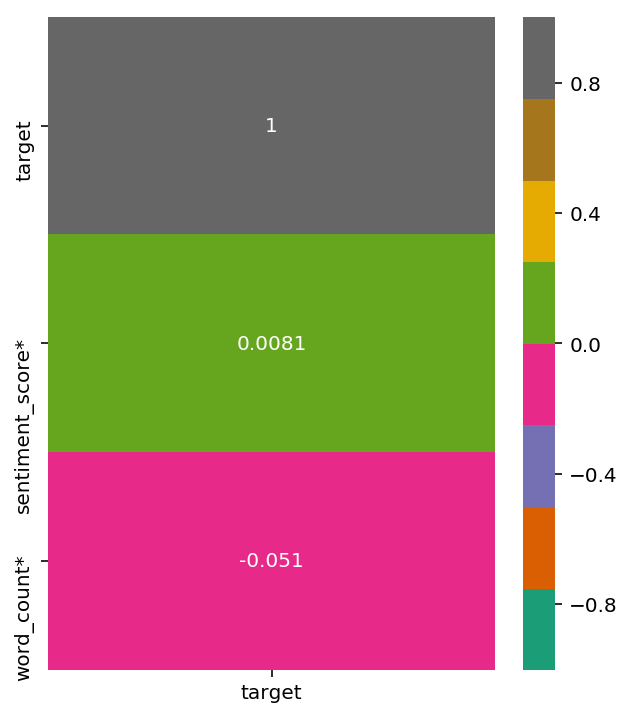

In [19]:
plt.figure(figsize=(5,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='Dark2',
            annot=True);

plt.savefig("../Figures/EDA_corr_plot.png")

## Let's count vectorize the data

* Add some stop words to the general list
* Apply the new list of stop words list (extend)
* Apply count vectorize to the data

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['http', 'would', 'com']
stopwords.extend(newStopWords)

cvec = CountVectorizer(stop_words=stopwords, min_df=4, max_df=1.0,
                       ngram_range=(1,2))

In [21]:
term_mat = cvec.fit_transform(df_reddit['text_merged'])

In [22]:
len(cvec.get_feature_names())

7813

In [23]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())
term_df.insert(0, 'targets', targets)

In [24]:
term_df.head()

targets  aa  ab  ab secret  abandon  abc  abil  abl  abl build  abl captur  \
0        1   0   0          0        0    0     0    0          0           0   
1        1   0   0          0        0    0     0    0          0           0   
2        1   0   0          0        0    0     0    0          0           0   
3        1   0   0          0        0    0     0    0          0           0   
4        1   0   0          0        0    0     0    0          0           0   

       ...        zealand  zero  zero graviti  zip  zone  zoom  zoom see  \
0      ...              0     0             0    0     0     0         0   
1      ...              0     0             0    0     0     0         0   
2      ...              0     0             0    0     0     0         0   
3      ...              0     0             0    0     0     0         0   
4      ...              0     0             0    0     0     0         0   

   zubrin  zvezda  zvezda servic  
0       0       0              0  
1       0       0              0  
2       0       0              0  
3       0       0              0  
4       0       0              0  

[5 rows x 7814 columns]

In [29]:
# term_df.groupby('targets').mean().T

In [30]:
# term_df.groupby('targets').mean().T.sort_values(0, ascending=False)

In [26]:
top_words_nasa = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(20).index)

top_words_space_dis = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(20).index)

top_words_overlap = [word for word in top_words_space_dis if word in top_words_nasa]
top_words_overlap

['nasa',
 'space',
 'moon',
 'earth',
 'mar',
 'year',
 'launch',
 'like',
 'one',
 'first',
 'new',
 'amp',
 'time']

### Number of characters present in each sentence

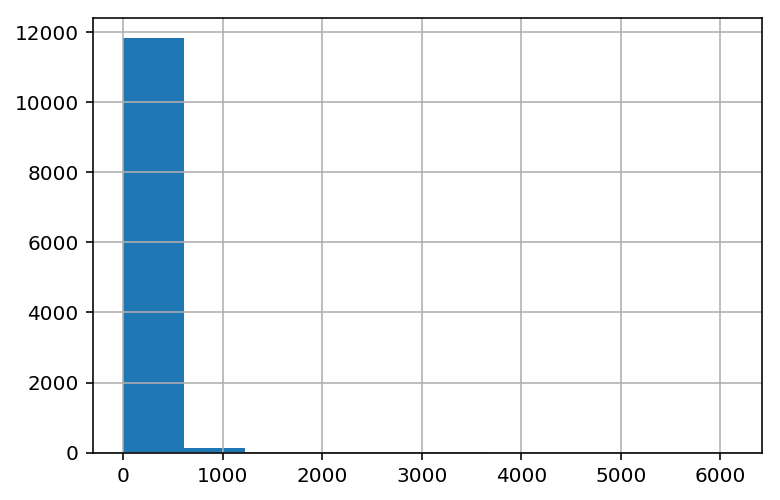

In [33]:
df_reddit['text_merged'].str.len().hist()
# plt.xscale('log')

### Average word length in each sentence

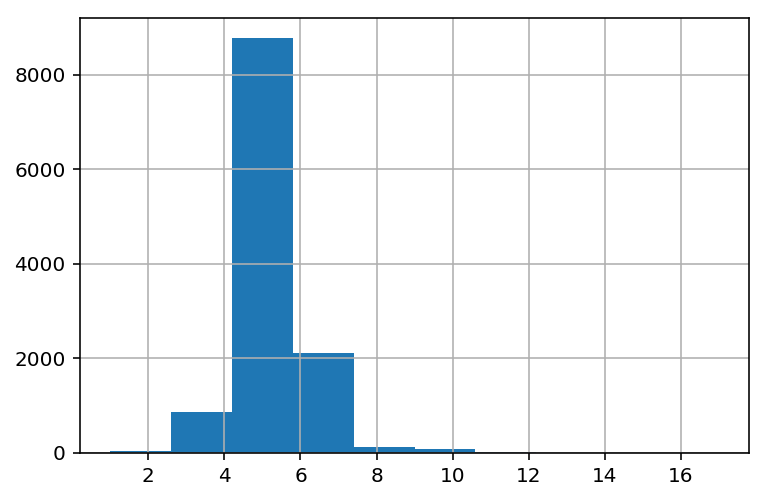

In [35]:
df_reddit['text_merged'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### Inspect which words other than stopwords occur frequently

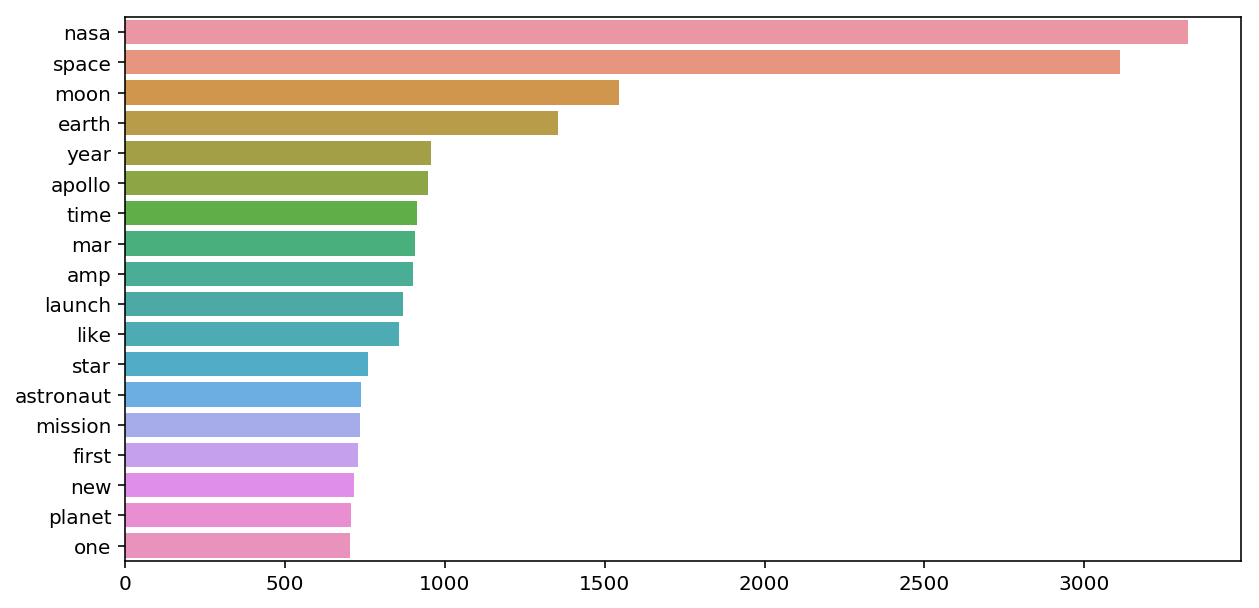

In [62]:
plt.figure(figsize=(10,5))
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:20]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
a = sns.barplot(x=y,y=x)

nasa, space, moon and earth are top words in comments.

### Looking at most frequent n-grams can give you a better understanding of the context 

In [60]:
from nltk.util import ngrams

### Bigram

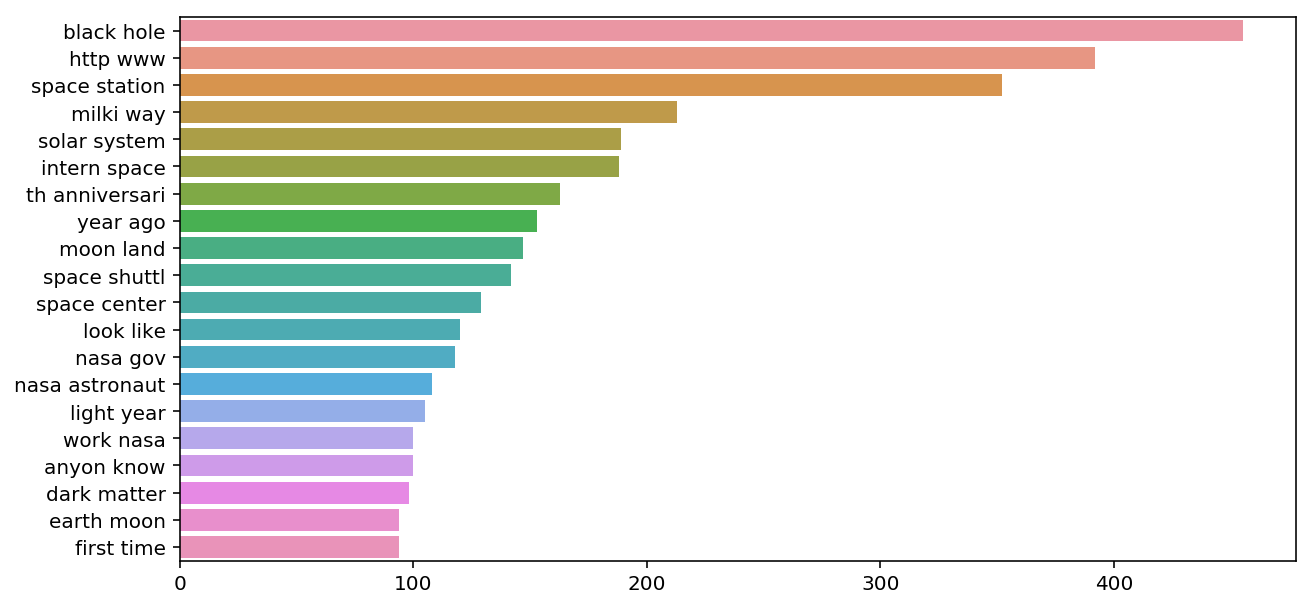

In [65]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=get_top_ngram(df_reddit['text_merged'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

### Trigrams

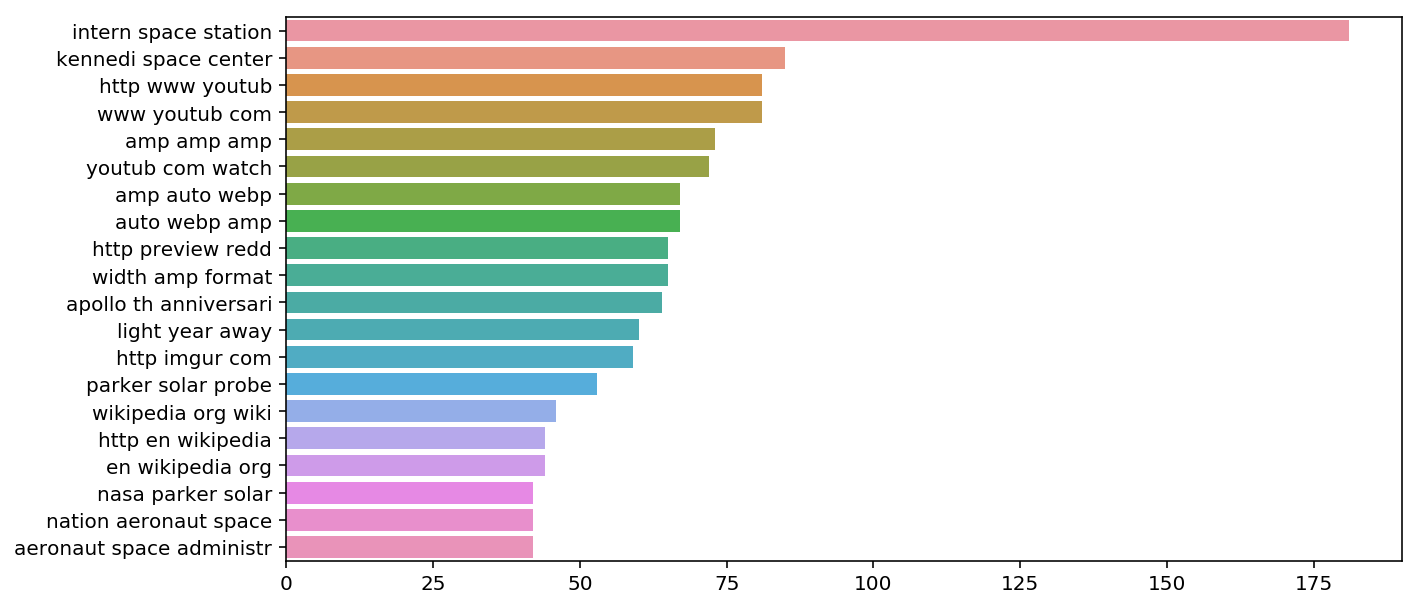

In [67]:
top_tri_grams=get_top_ngram(df_reddit['text_merged'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

In [36]:
pickle.dump(df_reddit, open('../DataSet/df_reddit_for_model.pkl', 'wb'))